## Códigos após adequação da Base Original e inserção de mais informações

In [2]:
#Importação das Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import sklearn.cluster as cluster
import warnings
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('CityTemperatureAjustada.csv')
df.head()

,DimCalendario_CodSkData,DimCalendario_DataCalendario,DimCalendario_NumAno,DimCalendario_DescAno,DimCalendario_NumSemestre,DimCalendario_DescSesmestre,DimCalendario_NumTrimestre,DimCalendario_DescTrimestre,DimCalendario_NumMes,DimCalendario_DescMes,DimCalendario_NumSemanaAno,DimCalendario_DescSemanaAno,DimCalendario_NumDia,DimCalendario_NumDiaSemana,DimCalendario_DescDiaSemana,DimCalendario_FlgFinalSemana,DimCalendario_DescEstacao,DimCidade_CodSkCidade,DimCidade_NomCidade,DimCidade_NomEstado,DimCidade_NomPais,DimCidade_NomRegiaoGlobo,DimCidade_ValLatitude,DimCidade_ValLongitude,DimCidade_FlgHemisferioNorte,FatTempearatura_ValMedioTemperaturaCelsius,ClusterCidade_CategoriaInverno,ClusterCidade_TempMediaInverno,ClusterCidade_CategoriaOutono,ClusterCidade_TempMediaOutuno,ClusterCidade_CategoriaPrimavera,ClusterCidade_TempMediaPrimavera,ClusterCidade_CategoriaVerao,ClusterCidade_TempMediaVerao,ClusterCidade_ClusterDefinicao,ClusterCidade_ClusterFinal
0,19950101,1995-01-01,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,1,1,DOM,S,Inverno,1,Algiers,*** Estado Não Informado,Algeria,Africa,36.775361,3.060188,S,17.89,INVERNO 2,11.618557,OUTONO 3,16.776484,PRIMAVERA 2,17.887096,VERÃO 3,25.456704,"... onde 1 mais frio, 3 mais quente",1
1,19950102,1995-01-02,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,2,2,SEG,N,Inverno,1,Algiers,*** Estado Não Informado,Algeria,Africa,36.775361,3.060188,S,9.67,INVERNO 2,11.618557,OUTONO 3,16.776484,PRIMAVERA 2,17.887096,VERÃO 3,25.456704,"... onde 1 mais frio, 3 mais quente",1
2,19950103,1995-01-03,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,3,3,TER,N,Inverno,1,Algiers,*** Estado Não Informado,Algeria,Africa,36.775361,3.060188,S,9.33,INVERNO 2,11.618557,OUTONO 3,16.776484,PRIMAVERA 2,17.887096,VERÃO 3,25.456704,"... onde 1 mais frio, 3 mais quente",1
3,19950104,1995-01-04,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,4,4,QUA,N,Inverno,1,Algiers,*** Estado Não Informado,Algeria,Africa,36.775361,3.060188,S,8.00,INVERNO 2,11.618557,OUTONO 3,16.776484,PRIMAVERA 2,17.887096,VERÃO 3,25.456704,"... onde 1 mais frio, 3 mais quente",1
4,19950105,1995-01-05,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,5,5,QUI,N,Inverno,1,Algiers,*** Estado Não Informado,Algeria,Africa,36.775361,3.060188,S,8.83,INVERNO 2,11.618557,OUTONO 3,16.776484,PRIMAVERA 2,17.887096,VERÃO 3,25.456704,"... onde 1 mais frio, 3 mais quente",1


In [4]:
df.columns

Index(['DimCalendario_CodSkData', 'DimCalendario_DataCalendario',
       'DimCalendario_NumAno', 'DimCalendario_DescAno',
       'DimCalendario_NumSemestre', 'DimCalendario_DescSesmestre',
       'DimCalendario_NumTrimestre', 'DimCalendario_DescTrimestre',
       'DimCalendario_NumMes', 'DimCalendario_DescMes',
       'DimCalendario_NumSemanaAno', 'DimCalendario_DescSemanaAno',
       'DimCalendario_NumDia', 'DimCalendario_NumDiaSemana',
       'DimCalendario_DescDiaSemana', 'DimCalendario_FlgFinalSemana',
       'DimCalendario_DescEstacao', 'DimCidade_CodSkCidade',
       'DimCidade_NomCidade', 'DimCidade_NomEstado', 'DimCidade_NomPais',
       'DimCidade_NomRegiaoGlobo', 'DimCidade_ValLatitude',
       'DimCidade_ValLongitude', 'DimCidade_FlgHemisferioNorte',
       'FatTempearatura_ValMedioTemperaturaCelsius',
       'ClusterCidade_CategoriaInverno', 'ClusterCidade_TempMediaInverno',
       'ClusterCidade_CategoriaOutono', 'ClusterCidade_TempMediaOutuno',
       'ClusterCidade_Categ

In [5]:
df.describe()

,DimCalendario_CodSkData,DimCalendario_NumAno,DimCalendario_NumSemestre,DimCalendario_NumTrimestre,DimCalendario_NumMes,DimCalendario_NumSemanaAno,DimCalendario_NumDia,DimCalendario_NumDiaSemana,DimCidade_CodSkCidade,DimCidade_ValLatitude,DimCidade_ValLongitude,FatTempearatura_ValMedioTemperaturaCelsius,ClusterCidade_TempMediaInverno,ClusterCidade_TempMediaOutuno,ClusterCidade_TempMediaPrimavera,ClusterCidade_TempMediaVerao,ClusterCidade_ClusterFinal
count,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06,2.845082e+06
mean,2.007096e+07,2.007029e+03,1.496408e+00,2.490550e+00,6.464736e+00,2.673518e+01,1.570962e+01,3.998691e+00,1.670380e+02,3.173765e+01,-3.840027e+01,1.579819e+01,7.836027e+00,1.330819e+01,1.793313e+01,2.379378e+01,2.875407e+00
std,7.268371e+04,7.269212e+00,4.999872e-01,1.119322e+00,3.455690e+00,1.509516e+01,8.799982e+00,1.998603e+00,9.251336e+01,1.922223e+01,7.461929e+01,1.059613e+01,9.937021e+00,7.834651e+00,6.266260e+00,4.464117e+00,1.310688e+00
min,1.995010e+07,1.995000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.781422e+01,-1.577173e+02,-4.011000e+01,-1.932126e+01,-1.073606e+01,5.808491e+00,8.531238e+00,1.000000e+00
25%,2.001040e+07,2.001000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.400000e+01,8.000000e+00,2.000000e+00,8.800000e+01,2.770832e+01,-9.212512e+01,8.610000e+00,4.164356e-01,7.162313e+00,1.301123e+01,2.090318e+01,1.000000e+00
50%,2.007061e+07,2.007000e+03,1.000000e+00,2.000000e+00,6.000000e+00,2.700000e+01,1.600000e+01,4.000000e+00,1.710000e+02,3.756668e+01,-7.717737e+01,1.739000e+01,5.623588e+00,1.185306e+01,1.706414e+01,2.377851e+01,4.000000e+00
75%,2.013092e+07,2.013000e+03,2.000000e+00,3.000000e+00,9.000000e+00,4.000000e+01,2.300000e+01,6.000000e+00,2.470000e+02,4.273377e+01,1.710931e+01,2.439000e+01,1.449283e+01,1.850934e+01,2.236363e+01,2.702603e+01,4.000000e+00
max,2.020051e+07,2.020000e+03,2.000000e+00,4.000000e+00,1.200000e+01,5.400000e+01,3.100000e+01,7.000000e+00,3.250000e+02,6.483785e+01,1.747632e+02,4.333000e+01,2.878973e+01,2.951387e+01,3.414109e+01,3.825319e+01,5.000000e+00


In [6]:
#Escolhemos o EUA como referencia para o projeto
#filtrando 
us_cities = df[df['DimCidade_NomPais'] == 'US']
us_cities.head()

,DimCalendario_CodSkData,DimCalendario_DataCalendario,DimCalendario_NumAno,DimCalendario_DescAno,DimCalendario_NumSemestre,DimCalendario_DescSesmestre,DimCalendario_NumTrimestre,DimCalendario_DescTrimestre,DimCalendario_NumMes,DimCalendario_DescMes,DimCalendario_NumSemanaAno,DimCalendario_DescSemanaAno,DimCalendario_NumDia,DimCalendario_NumDiaSemana,DimCalendario_DescDiaSemana,DimCalendario_FlgFinalSemana,DimCalendario_DescEstacao,DimCidade_CodSkCidade,DimCidade_NomCidade,DimCidade_NomEstado,DimCidade_NomPais,DimCidade_NomRegiaoGlobo,DimCidade_ValLatitude,DimCidade_ValLongitude,DimCidade_FlgHemisferioNorte,FatTempearatura_ValMedioTemperaturaCelsius,ClusterCidade_CategoriaInverno,ClusterCidade_TempMediaInverno,ClusterCidade_CategoriaOutono,ClusterCidade_TempMediaOutuno,ClusterCidade_CategoriaPrimavera,ClusterCidade_TempMediaPrimavera,ClusterCidade_CategoriaVerao,ClusterCidade_TempMediaVerao,ClusterCidade_ClusterDefinicao,ClusterCidade_ClusterFinal
1169409,19950101,1995-01-01,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,1,1,DOM,S,Inverno,143,San Juan Puerto Rico,Additional Territories,US,North America,18.465299,-66.116666,S,25.22,INVERNO 3,24.854617,OUTONO 3,26.707751,PRIMAVERA 3,26.658588,VERÃO 3,28.01744,"... onde 1 mais frio, 3 mais quente",2
1169410,19950102,1995-01-02,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,2,2,SEG,N,Inverno,143,San Juan Puerto Rico,Additional Territories,US,North America,18.465299,-66.116666,S,25.61,INVERNO 3,24.854617,OUTONO 3,26.707751,PRIMAVERA 3,26.658588,VERÃO 3,28.01744,"... onde 1 mais frio, 3 mais quente",2
1169411,19950103,1995-01-03,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,3,3,TER,N,Inverno,143,San Juan Puerto Rico,Additional Territories,US,North America,18.465299,-66.116666,S,24.83,INVERNO 3,24.854617,OUTONO 3,26.707751,PRIMAVERA 3,26.658588,VERÃO 3,28.01744,"... onde 1 mais frio, 3 mais quente",2
1169412,19950104,1995-01-04,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,4,4,QUA,N,Inverno,143,San Juan Puerto Rico,Additional Territories,US,North America,18.465299,-66.116666,S,25.39,INVERNO 3,24.854617,OUTONO 3,26.707751,PRIMAVERA 3,26.658588,VERÃO 3,28.01744,"... onde 1 mais frio, 3 mais quente",2
1169413,19950105,1995-01-05,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,5,5,QUI,N,Inverno,143,San Juan Puerto Rico,Additional Territories,US,North America,18.465299,-66.116666,S,25.28,INVERNO 3,24.854617,OUTONO 3,26.707751,PRIMAVERA 3,26.658588,VERÃO 3,28.01744,"... onde 1 mais frio, 3 mais quente",2


In [7]:
us_cities = df[df['DimCidade_NomPais'] == 'US']
print('Cidades: ', us_cities['DimCidade_NomCidade'].unique(), 'Total :', us_cities['DimCidade_NomCidade'].nunique())

Cidades:  ['San Juan Puerto Rico' 'Birmingham' 'Huntsville' 'Mobile' 'Montgomery'
 'Anchorage' 'Fairbanks' 'Juneau' 'Flagstaff' 'Phoenix' 'Tucson' 'Yuma'
 'Fort Smith' 'Little Rock' 'Fresno' 'Los Angeles' 'Sacramento'
 'San Diego' 'San Francisco' 'Colorado Springs' 'Denver' 'Grand Junction'
 'Pueblo' 'Bridgeport' 'Hartford Springfield' 'Wilmington' 'Washington'
 'Daytona Beach' 'Jacksonville' 'Miami Beach' 'Orlando' 'Tallahassee'
 'Tampa St. Petersburg' 'West Palm Beach' 'Atlanta' 'Columbus' 'Macon'
 'Savannah' 'Honolulu' 'Boise' 'Pocatello' 'Chicago' 'Peoria' 'Rockford'
 'Springfield' 'Evansville' 'Fort Wayne' 'Indianapolis' 'South Bend'
 'Des Moines' 'Sioux City' 'Goodland' 'Topeka' 'Wichita' 'Lexington'
 'Louisville' 'Paducah' 'Baton Rouge' 'Lake Charles' 'New Orleans'
 'Shreveport' 'Caribou' 'Portland' 'Baltimore' 'Washington DC' 'Boston'
 'Detroit' 'Flint' 'Grand Rapids' 'Lansing' 'Sault Ste Marie' 'Duluth'
 'Minneapolis St. Paul' 'Jackson' 'Tupelo' 'Kansas City' 'St Louis'
 'Bill

In [8]:
#Delimitamos para 20 Cidades

top_20 = ['Atlanta','Boston','Chicago','Denver','Detroit','Honolulu','Houston','Indianapolis',
        'Las Vegas','Los Angeles','Miami Beach','New York City','Oklahoma City','Orlando',
        'Philadelphia','Sacramento','San Diego','San Francisco','Seattle','Washington DC']

#Dados com as cidades Top 20

top_20_us = pd.DataFrame(us_cities[us_cities['DimCidade_NomCidade'].isin(top_20)])
top_20_us.head()

,DimCalendario_CodSkData,DimCalendario_DataCalendario,DimCalendario_NumAno,DimCalendario_DescAno,DimCalendario_NumSemestre,DimCalendario_DescSesmestre,DimCalendario_NumTrimestre,DimCalendario_DescTrimestre,DimCalendario_NumMes,DimCalendario_DescMes,DimCalendario_NumSemanaAno,DimCalendario_DescSemanaAno,DimCalendario_NumDia,DimCalendario_NumDiaSemana,DimCalendario_DescDiaSemana,DimCalendario_FlgFinalSemana,DimCalendario_DescEstacao,DimCidade_CodSkCidade,DimCidade_NomCidade,DimCidade_NomEstado,DimCidade_NomPais,DimCidade_NomRegiaoGlobo,DimCidade_ValLatitude,DimCidade_ValLongitude,DimCidade_FlgHemisferioNorte,FatTempearatura_ValMedioTemperaturaCelsius,ClusterCidade_CategoriaInverno,ClusterCidade_TempMediaInverno,ClusterCidade_CategoriaOutono,ClusterCidade_TempMediaOutuno,ClusterCidade_CategoriaPrimavera,ClusterCidade_TempMediaPrimavera,ClusterCidade_CategoriaVerao,ClusterCidade_TempMediaVerao,ClusterCidade_ClusterDefinicao,ClusterCidade_ClusterFinal
1294054,19950101,1995-01-01,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,1,1,DOM,S,Inverno,158,Los Angeles,California,US,North America,34.053691,-118.242766,S,13.56,INVERNO 2,14.160041,OUTONO 3,17.265282,PRIMAVERA 2,16.597889,VERÃO 3,20.422336,"... onde 1 mais frio, 3 mais quente",1
1294055,19950102,1995-01-02,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,2,2,SEG,N,Inverno,158,Los Angeles,California,US,North America,34.053691,-118.242766,S,12.83,INVERNO 2,14.160041,OUTONO 3,17.265282,PRIMAVERA 2,16.597889,VERÃO 3,20.422336,"... onde 1 mais frio, 3 mais quente",1
1294056,19950103,1995-01-03,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,3,3,TER,N,Inverno,158,Los Angeles,California,US,North America,34.053691,-118.242766,S,12.39,INVERNO 2,14.160041,OUTONO 3,17.265282,PRIMAVERA 2,16.597889,VERÃO 3,20.422336,"... onde 1 mais frio, 3 mais quente",1
1294057,19950104,1995-01-04,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,4,4,QUA,N,Inverno,158,Los Angeles,California,US,North America,34.053691,-118.242766,S,12.00,INVERNO 2,14.160041,OUTONO 3,17.265282,PRIMAVERA 2,16.597889,VERÃO 3,20.422336,"... onde 1 mais frio, 3 mais quente",1
1294058,19950105,1995-01-05,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,5,5,QUI,N,Inverno,158,Los Angeles,California,US,North America,34.053691,-118.242766,S,13.67,INVERNO 2,14.160041,OUTONO 3,17.265282,PRIMAVERA 2,16.597889,VERÃO 3,20.422336,"... onde 1 mais frio, 3 mais quente",1


## Mapa com as 20 cidades escolhidas

In [9]:
# Plotando as cidades no Mapa
#DimCidade_ValLatitude
#DimCidade_ValLongitude
#DimCidade_NomCidade

#Importação dos pacotes
import folium 
import pandas as pd
import plotly.express as px
import requests

#Criando uma tabela somente com as cidades, coordenadas e Cluster para plotar o Mapa
top_20_us_mapa = top_20_us.groupby(['DimCidade_NomCidade'])['DimCidade_NomCidade','DimCidade_ValLatitude', 
                                                            'DimCidade_ValLongitude', 'ClusterCidade_ClusterFinal'].agg('max')


mapa = folium.Map(                                  
    location=[34.797152, -103.677898],
    zoom_start=3.4
)

#Plotando
for _, cidade in top_20_us_mapa.iterrows():
    folium.Marker(
        location=[cidade['DimCidade_ValLatitude'], cidade['DimCidade_ValLongitude']],
    ).add_to(mapa)

mapa

### Mapa com a informação de divisão das cidades por Cluster

In [10]:
top_20_us_mapa.head(20)

,DimCidade_NomCidade,DimCidade_ValLatitude,DimCidade_ValLongitude,ClusterCidade_ClusterFinal
DimCidade_NomCidade,,,,
Atlanta,Atlanta,33.748992,-84.390264,3
Boston,Boston,42.355433,-71.060511,4
Chicago,Chicago,41.875562,-87.624421,4
Denver,Denver,39.739236,-104.984862,4
Detroit,Detroit,42.331551,-83.046640,4
Honolulu,Honolulu,21.289100,-157.717299,2
Houston,Houston,29.758938,-95.367697,1
Indianapolis,Indianapolis,39.768333,-86.158350,4
Las Vegas,Las Vegas,36.167256,-115.148516,1


In [11]:
# Plotando as cidades no Mapa
#DimCidade_ValLatitude
#DimCidade_ValLongitude
#DimCidade_NomCidade
#ClusterCidade_ClusterFinal

mapa2 = folium.Map(                                  
    location=[34.797152, -103.677898],
    zoom_start=3.4
)


#Color code the markers to show blue markers for public universities and brown colors for private universities
for i in range(0,len(top_20_us_mapa)):
    cluster = top_20_us_mapa['ClusterCidade_ClusterFinal'].iloc[i]
    if cluster == 1:
        color = 'blue'
    elif cluster == 2:
        color = 'red'
    elif cluster == 3:
        color = 'yellow'
    elif cluster == 4:
        color = 'green'
        
    labels=top_20_us_mapa['ClusterCidade_ClusterFinal'].iloc[i] #Create a lable that is the name of the institution

    folium.Marker([top_20_us_mapa['DimCidade_ValLatitude'].iloc[i],top_20_us_mapa['DimCidade_ValLongitude'].iloc[i]],popup=labels,
                 icon=folium.Icon(color=color, icon='cluster', prefix='fa')).add_to(mapa2) 
mapa2

### Legenda Clusters:
Cluster 1 = Azul;
Cluster 2 = Vermelho;
CLuster 3 = Amarelo
Cluster 4 = Verde

Text(0.5, 1.0, 'Media por Cidade')

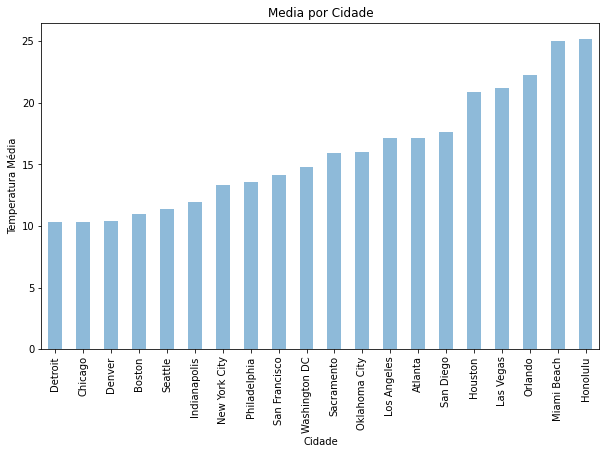

In [12]:
# Gráfico da média das temperaturas das 20 Cidades ao longo do tempo

#EDA das 20 Cidades Escolhidas

top_20_us = pd.Series(round(top_20_us.groupby('DimCidade_NomCidade')['FatTempearatura_ValMedioTemperaturaCelsius'].mean().sort_values(),2))
top_20_us.plot(kind = 'bar', figsize = (10,6), alpha = 0.5)
plt.xlabel('Cidade')
plt.ylabel('Temperatura Média')
plt.title('Media por Cidade')

Text(0.5, 1.0, 'Media Geral por Semana')

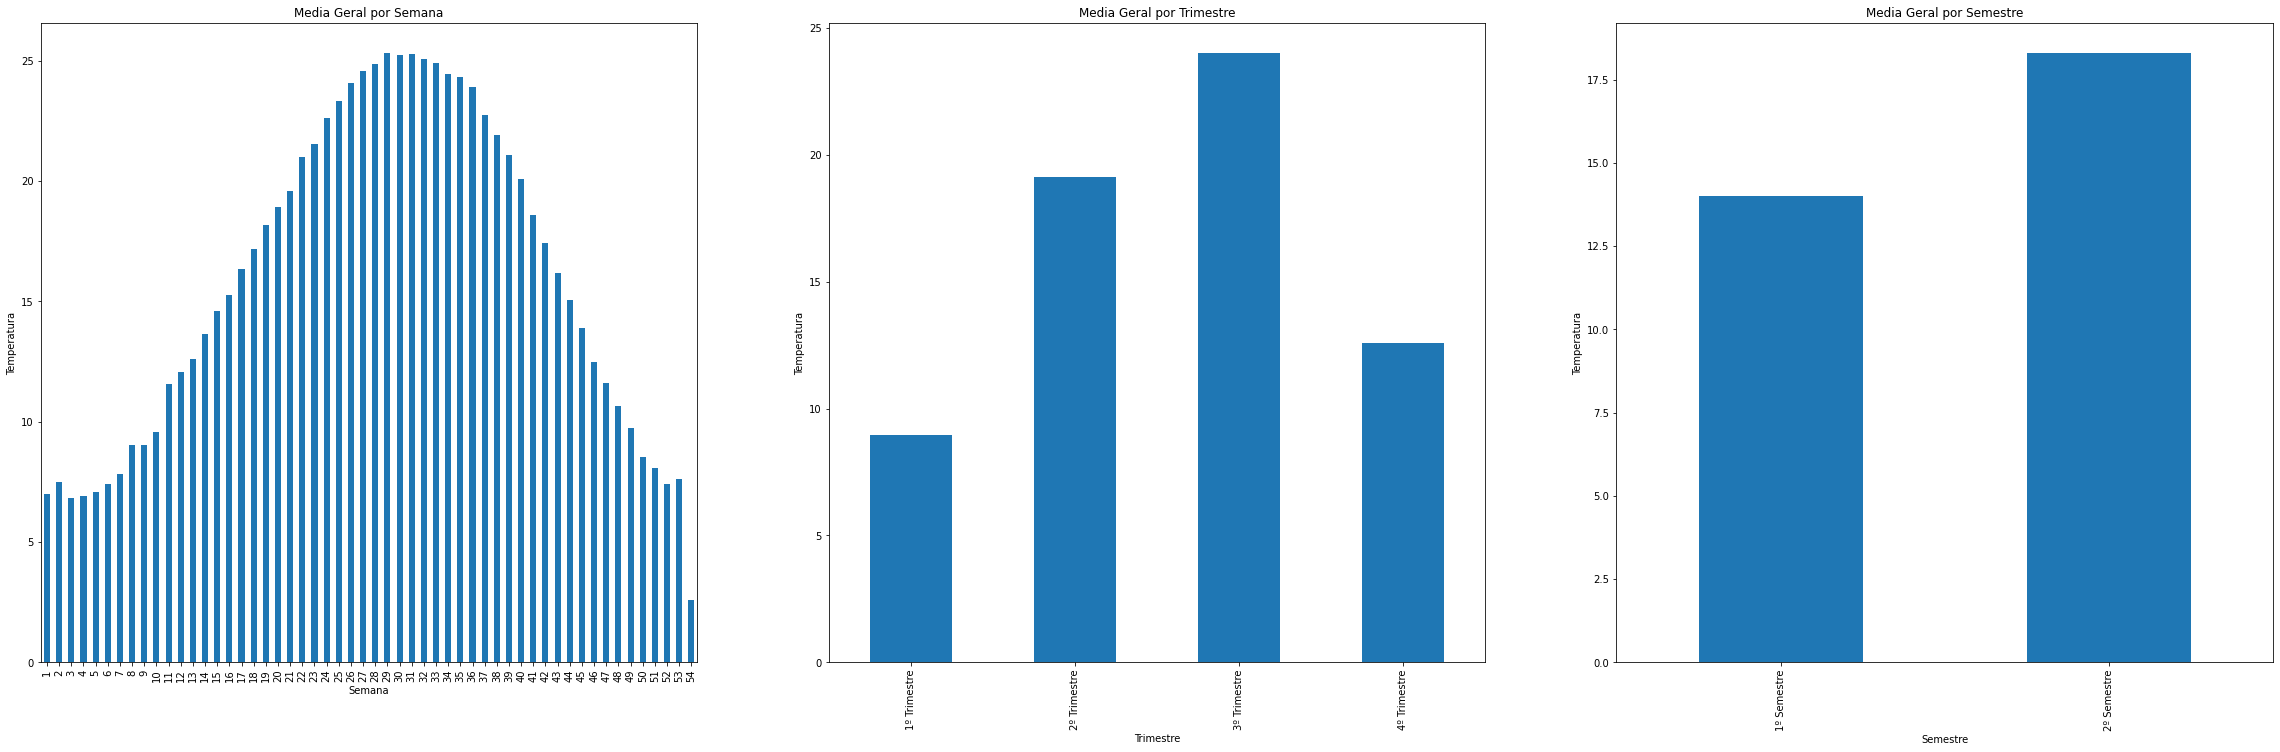

In [13]:
# Gráficos da média das temperaturas das 20 Cidades por Semana, Semestre e Trimestre

top_20_us = pd.DataFrame(us_cities[us_cities['DimCidade_NomCidade'].isin(top_20)])

#EDA Trimestral
plt.subplot(3,3,2)
top_20_us.groupby(['DimCalendario_DescTrimestre'])['FatTempearatura_ValMedioTemperaturaCelsius'].mean().plot(kind='bar')
plt.xlabel('Trimestre')
plt.ylabel('Temperatura')
plt.title('Media Geral por Trimestre')

#EDA Semestral
plt.subplot(3,3,3)
top_20_us.groupby(['DimCalendario_DescSesmestre'])['FatTempearatura_ValMedioTemperaturaCelsius'].mean().plot(kind='bar')
plt.xlabel('Semestre')
plt.ylabel('Temperatura')
plt.title('Media Geral por Semestre')

#EDA Semanal
plt.subplot(3,3,1) 
top_20_us.groupby(['DimCalendario_NumSemanaAno'])['FatTempearatura_ValMedioTemperaturaCelsius'].mean().plot(kind='bar',figsize=(40,40))
plt.xlabel('Semana')
plt.ylabel('Temperatura')
plt.title('Media Geral por Semana')

Text(0.5, 1.0, 'Media Geral por Estações do Ano')

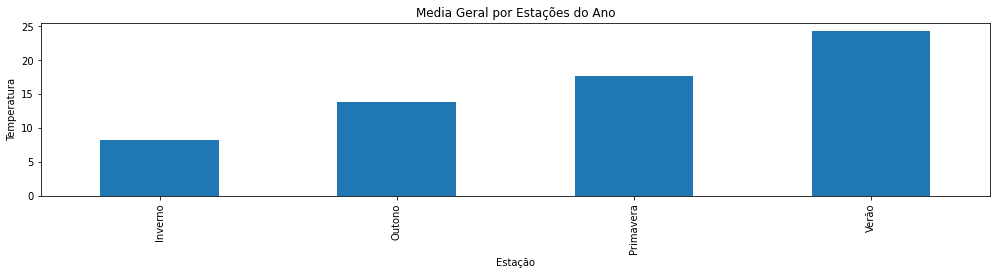

In [14]:
# Gráfico da média das temperaturas das 20 Cidades por estação do Ano

top_20_us = pd.DataFrame(us_cities[us_cities['DimCidade_NomCidade'].isin(top_20)])

#EDA Estações

plt.subplot(2,1,1)
top_20_us.groupby(['DimCalendario_DescEstacao'])['FatTempearatura_ValMedioTemperaturaCelsius'].mean().plot(kind='bar',figsize=(17,7))
plt.xlabel('Estação')
plt.ylabel('Temperatura')
plt.title('Media Geral por Estações do Ano')



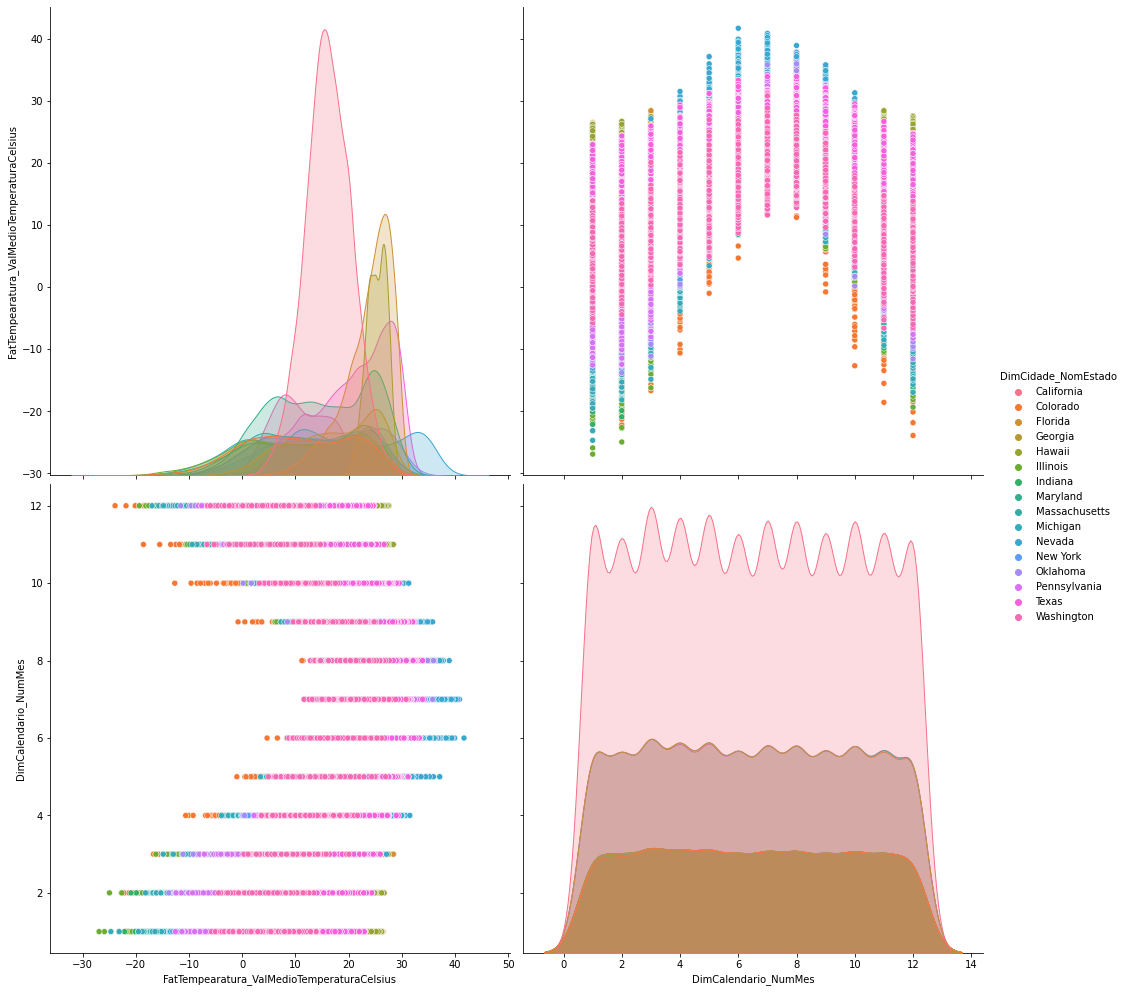

In [15]:
# COLOCAR O QUE SIGNIFICA ESTES GRÁFICOS... TÁ MUITO PEQUENO PRA LER

top_20_us = pd.DataFrame(us_cities[us_cities['DimCidade_NomCidade'].isin(top_20)])

sns.pairplot(data=top_20_us[['FatTempearatura_ValMedioTemperaturaCelsius','DimCidade_NomEstado','DimCalendario_NumMes']], hue='DimCidade_NomEstado',height=7, aspect=1)



<AxesSubplot:title={'center':'Media das temperaturas das cidades com Cluster'}, xlabel='FatTempearatura_ValMedioTemperaturaCelsius', ylabel='DimCidade_NomCidade'>

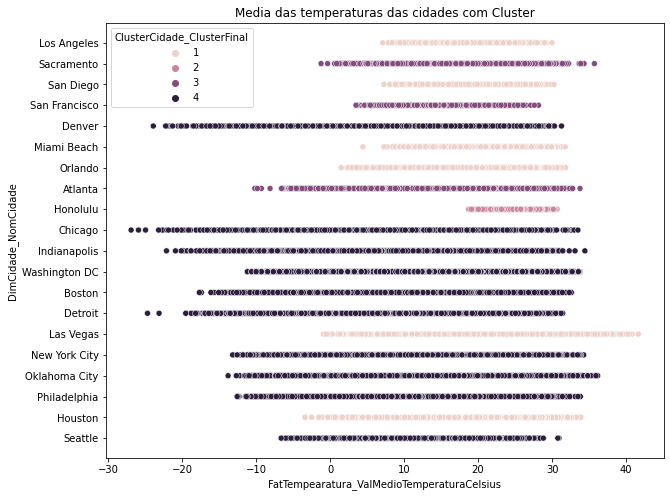

In [16]:
# Gráfico com os valores médios das temperaturas das cidades com a informação de Cluster

#EDA Cluster

plt.figure(figsize=(10,8))
plt.title('Media das temperaturas das cidades com Cluster')
sns.scatterplot(x ='FatTempearatura_ValMedioTemperaturaCelsius' , y = 'DimCidade_NomCidade', hue = 'ClusterCidade_ClusterFinal', data = top_20_us)


In [17]:
# Informações da tabela
top_20_us.head()

,DimCalendario_CodSkData,DimCalendario_DataCalendario,DimCalendario_NumAno,DimCalendario_DescAno,DimCalendario_NumSemestre,DimCalendario_DescSesmestre,DimCalendario_NumTrimestre,DimCalendario_DescTrimestre,DimCalendario_NumMes,DimCalendario_DescMes,DimCalendario_NumSemanaAno,DimCalendario_DescSemanaAno,DimCalendario_NumDia,DimCalendario_NumDiaSemana,DimCalendario_DescDiaSemana,DimCalendario_FlgFinalSemana,DimCalendario_DescEstacao,DimCidade_CodSkCidade,DimCidade_NomCidade,DimCidade_NomEstado,DimCidade_NomPais,DimCidade_NomRegiaoGlobo,DimCidade_ValLatitude,DimCidade_ValLongitude,DimCidade_FlgHemisferioNorte,FatTempearatura_ValMedioTemperaturaCelsius,ClusterCidade_CategoriaInverno,ClusterCidade_TempMediaInverno,ClusterCidade_CategoriaOutono,ClusterCidade_TempMediaOutuno,ClusterCidade_CategoriaPrimavera,ClusterCidade_TempMediaPrimavera,ClusterCidade_CategoriaVerao,ClusterCidade_TempMediaVerao,ClusterCidade_ClusterDefinicao,ClusterCidade_ClusterFinal
1294054,19950101,1995-01-01,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,1,1,DOM,S,Inverno,158,Los Angeles,California,US,North America,34.053691,-118.242766,S,13.56,INVERNO 2,14.160041,OUTONO 3,17.265282,PRIMAVERA 2,16.597889,VERÃO 3,20.422336,"... onde 1 mais frio, 3 mais quente",1
1294055,19950102,1995-01-02,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,2,2,SEG,N,Inverno,158,Los Angeles,California,US,North America,34.053691,-118.242766,S,12.83,INVERNO 2,14.160041,OUTONO 3,17.265282,PRIMAVERA 2,16.597889,VERÃO 3,20.422336,"... onde 1 mais frio, 3 mais quente",1
1294056,19950103,1995-01-03,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,3,3,TER,N,Inverno,158,Los Angeles,California,US,North America,34.053691,-118.242766,S,12.39,INVERNO 2,14.160041,OUTONO 3,17.265282,PRIMAVERA 2,16.597889,VERÃO 3,20.422336,"... onde 1 mais frio, 3 mais quente",1
1294057,19950104,1995-01-04,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,4,4,QUA,N,Inverno,158,Los Angeles,California,US,North America,34.053691,-118.242766,S,12.00,INVERNO 2,14.160041,OUTONO 3,17.265282,PRIMAVERA 2,16.597889,VERÃO 3,20.422336,"... onde 1 mais frio, 3 mais quente",1
1294058,19950105,1995-01-05,1995,Ano 1995,1,1º Semestre,1,1º Trimestre,1,Janeiro,1,1ª Semana,5,5,QUI,N,Inverno,158,Los Angeles,California,US,North America,34.053691,-118.242766,S,13.67,INVERNO 2,14.160041,OUTONO 3,17.265282,PRIMAVERA 2,16.597889,VERÃO 3,20.422336,"... onde 1 mais frio, 3 mais quente",1


In [18]:
# Informações da tabela
top_20_us.shape

(203346, 36)

In [19]:
# Retirando as colunas para adequar a base aos modelos que serão utilizados

top_20_us_new = top_20_us.drop(columns=['DimCalendario_CodSkData',
       'DimCalendario_NumAno', 'DimCalendario_DescAno',
       'DimCalendario_NumSemestre', 'DimCalendario_DescSesmestre',
       'DimCalendario_NumTrimestre', 'DimCalendario_DescTrimestre',
       'DimCalendario_NumMes', 'DimCalendario_DescMes',
       'DimCalendario_NumSemanaAno', 'DimCalendario_DescSemanaAno',
       'DimCalendario_NumDia', 'DimCalendario_NumDiaSemana',
       'DimCalendario_DescDiaSemana', 'DimCalendario_FlgFinalSemana',
       'DimCalendario_DescEstacao', 'DimCidade_CodSkCidade', 'DimCidade_NomEstado', 'DimCidade_NomPais',
       'DimCidade_NomRegiaoGlobo', 'DimCidade_ValLatitude',
       'DimCidade_ValLongitude', 'DimCidade_FlgHemisferioNorte',
       'ClusterCidade_CategoriaInverno', 'ClusterCidade_TempMediaInverno',
       'ClusterCidade_CategoriaOutono', 'ClusterCidade_TempMediaOutuno',
       'ClusterCidade_CategoriaPrimavera', 'ClusterCidade_TempMediaPrimavera',
       'ClusterCidade_CategoriaVerao', 'ClusterCidade_TempMediaVerao',
       'ClusterCidade_ClusterDefinicao','DimCidade_NomCidade'])

top_20_us_new.head()


,DimCalendario_DataCalendario,FatTempearatura_ValMedioTemperaturaCelsius,ClusterCidade_ClusterFinal
1294054,1995-01-01,13.56,1
1294055,1995-01-02,12.83,1
1294056,1995-01-03,12.39,1
1294057,1995-01-04,12.00,1
1294058,1995-01-05,13.67,1


In [20]:
#Fazer a divisão dos CLusters da tabela - Divisão dos Clusters

cluster1 = pd.DataFrame(top_20_us_new[top_20_us_new['ClusterCidade_ClusterFinal'] == 1])
cluster2 = pd.DataFrame(top_20_us_new[top_20_us_new['ClusterCidade_ClusterFinal'] == 2])
cluster3 = pd.DataFrame(top_20_us_new[top_20_us_new['ClusterCidade_ClusterFinal'] == 3])
cluster4 = pd.DataFrame(top_20_us_new[top_20_us_new['ClusterCidade_ClusterFinal'] == 4])

#cluster1.head()
#cluster2.head()
#cluster3.head()
#cluster4.head()

#O Algoritimo Prophet necessita apenas de duas colunas, coluna Data e Coluna "Objetivo", no caso a temperatura.
# Necessário retirar mais colunas para adequação ao modelo PROPHET

new_cluster1 = cluster1.drop(columns=['ClusterCidade_ClusterFinal'])
new_cluster2 = cluster2.drop(columns=['ClusterCidade_ClusterFinal'])
new_cluster3 = cluster3.drop(columns=['ClusterCidade_ClusterFinal'])
new_cluster4 = cluster4.drop(columns=['ClusterCidade_ClusterFinal'])




In [21]:
#Testes para saber se os Datasets dos Clusters, está correto
new_cluster1.head()


,DimCalendario_DataCalendario,FatTempearatura_ValMedioTemperaturaCelsius
1294054,1995-01-01,13.56
1294055,1995-01-02,12.83
1294056,1995-01-03,12.39
1294057,1995-01-04,12.00
1294058,1995-01-05,13.67


In [22]:
new_cluster2.head()

,DimCalendario_DataCalendario,FatTempearatura_ValMedioTemperaturaCelsius
1508729,1995-01-01,21.83
1508730,1995-01-02,22.50
1508731,1995-01-03,22.89
1508732,1995-01-04,22.17
1508733,1995-01-05,21.33


In [23]:
new_cluster3.head()

,DimCalendario_DataCalendario,FatTempearatura_ValMedioTemperaturaCelsius
1303305,1995-01-01,6.11
1303306,1995-01-02,4.78
1303307,1995-01-03,8.61
1303308,1995-01-04,9.56
1303309,1995-01-05,9.22


In [24]:
new_cluster4.head()

,DimCalendario_DataCalendario,FatTempearatura_ValMedioTemperaturaCelsius
1340284,1995-02-07,-1.00
1340285,1995-02-28,-8.22
1340286,1995-03-01,-9.61
1340287,1995-03-02,-9.61
1340288,1995-03-03,-1.50


In [25]:
#Prophet tambem solicita que a coluna Data e a coluna Objetivo, estejam escritas como 'ds' e 'y' respectivamente, Colunas renomeadas

new_cluster1 = new_cluster1.rename(columns={'DimCalendario_DataCalendario': 'ds', 'FatTempearatura_ValMedioTemperaturaCelsius': 'y'})
new_cluster2 = new_cluster2.rename(columns={'DimCalendario_DataCalendario': 'ds', 'FatTempearatura_ValMedioTemperaturaCelsius': 'y'})
new_cluster3 = new_cluster3.rename(columns={'DimCalendario_DataCalendario': 'ds', 'FatTempearatura_ValMedioTemperaturaCelsius': 'y'})
new_cluster4 = new_cluster4.rename(columns={'DimCalendario_DataCalendario': 'ds', 'FatTempearatura_ValMedioTemperaturaCelsius': 'y'})

In [26]:
#Fazendo a verificação

new_cluster1.head()

,ds,y
1294054,1995-01-01,13.56
1294055,1995-01-02,12.83
1294056,1995-01-03,12.39
1294057,1995-01-04,12.00
1294058,1995-01-05,13.67


## Fazer as predições de cada cluster usando o modelo Prophet

## Modelo - Cluster 1

In [27]:
#Iniciando a predição por clusters

modelo1 = Prophet(interval_width= 0.95)
modelo1 = modelo1.fit(new_cluster1)

11:10:32 - cmdstanpy - INFO - Chain [1] start processing
11:10:57 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
#Fazendo as predições

future1 = modelo1.make_future_dataframe(periods= 1327, freq= 'D')
future1.tail()

,ds
10575,2023-12-27
10576,2023-12-28
10577,2023-12-29
10578,2023-12-30
10579,2023-12-31


In [29]:
#Predict

forecast1 = modelo1.predict(future1)
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-01-01,20.483555,4.272341,22.546021,20.483555,20.483555,-7.116977,-7.116977,-7.116977,-0.045534,-0.045534,-0.045534,-7.071443,-7.071443,-7.071443,0.0,0.0,0.0,13.366578
1,1995-01-02,20.483495,4.393256,22.600789,20.483495,20.483495,-7.035757,-7.035757,-7.035757,0.037654,0.037654,0.037654,-7.073411,-7.073411,-7.073411,0.0,0.0,0.0,13.447737
2,1995-01-03,20.483434,4.588699,22.201509,20.483434,20.483434,-7.059653,-7.059653,-7.059653,0.011772,0.011772,0.011772,-7.071425,-7.071425,-7.071425,0.0,0.0,0.0,13.423781
3,1995-01-04,20.483374,5.346438,22.163417,20.483374,20.483374,-7.082201,-7.082201,-7.082201,-0.016329,-0.016329,-0.016329,-7.065872,-7.065872,-7.065872,0.0,0.0,0.0,13.401172
4,1995-01-05,20.483313,4.605534,22.142524,20.483313,20.483313,-7.047877,-7.047877,-7.047877,0.009271,0.009271,0.009271,-7.057148,-7.057148,-7.057148,0.0,0.0,0.0,13.435436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10575,2023-12-27,21.546602,5.848519,23.222767,21.052387,22.062417,-6.999848,-6.999848,-6.999848,-0.016329,-0.016329,-0.016329,-6.983519,-6.983519,-6.983519,0.0,0.0,0.0,14.546754
10576,2023-12-28,21.546652,5.487169,23.819686,21.051520,22.062937,-7.001985,-7.001985,-7.001985,0.009271,0.009271,0.009271,-7.011257,-7.011257,-7.011257,0.0,0.0,0.0,14.544667
10577,2023-12-29,21.546702,5.436758,23.044686,21.050652,22.063457,-7.008139,-7.008139,-7.008139,0.025470,0.025470,0.025470,-7.033609,-7.033609,-7.033609,0.0,0.0,0.0,14.538563
10578,2023-12-30,21.546752,6.010738,23.285229,21.049785,22.063978,-7.073044,-7.073044,-7.073044,-0.022304,-0.022304,-0.022304,-7.050740,-7.050740,-7.050740,0.0,0.0,0.0,14.473708


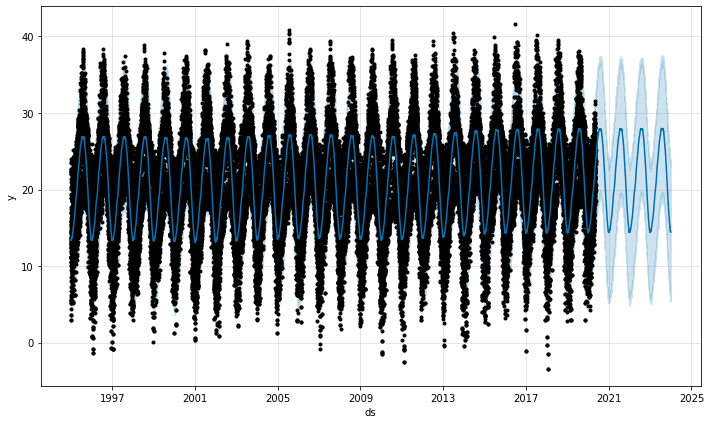

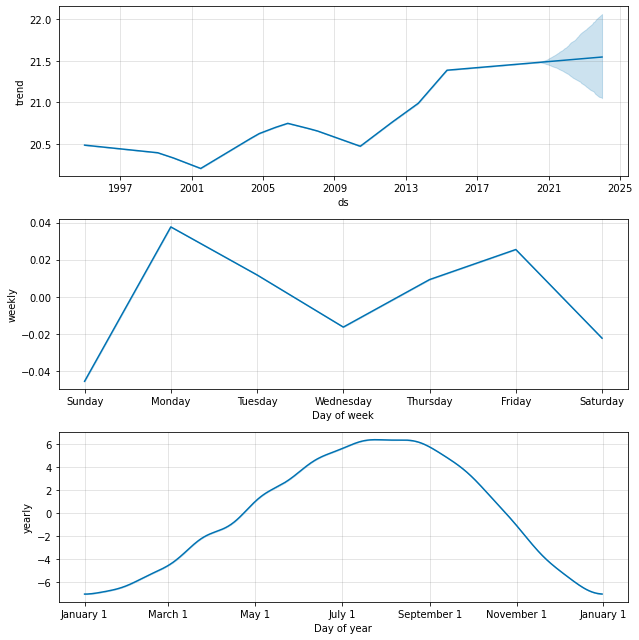

In [30]:
# Gráficos Modelo - CLuster 1
fig_cluster1 = modelo1.plot(forecast1)
fig_cluster12= modelo1.plot_components(forecast1)

In [31]:
df_cv1 = cross_validation(modelo1, initial= '4800 days', period = '1400 days', horizon= '720 days')

df_cv1.head()

  0%|          | 0/3 [00:00<?, ?it/s]11:11:05 - cmdstanpy - INFO - Chain [1] start processing
11:11:18 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:17<00:35, 17.88s/it]11:11:23 - cmdstanpy - INFO - Chain [1] start processing
11:11:43 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:46<00:24, 24.07s/it]11:11:54 - cmdstanpy - INFO - Chain [1] start processing
11:12:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [01:51<00:00, 37.03s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-09-24,24.09356,14.703232,33.012827,27.22,2010-09-23
1,2010-09-24,24.09356,15.496162,33.328012,20.17,2010-09-23
2,2010-09-24,24.09356,15.389563,32.664603,28.17,2010-09-23
3,2010-09-24,24.09356,15.513919,32.850310,27.00,2010-09-23
4,2010-09-24,24.09356,15.239800,32.019092,27.44,2010-09-23


In [32]:
df_p1 = performance_metrics(df_cv1)
df_p1.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,72 days,17.017752,4.125258,3.265897,0.151107,0.103020,0.142277,0.976190
1,73 days,16.914555,4.112731,3.249258,0.150548,0.101972,0.141761,0.976190
2,74 days,16.837550,4.103358,3.236220,0.151209,0.101492,0.141960,0.976852
3,75 days,16.815979,4.100729,3.230048,0.152715,0.101415,0.142666,0.976852
4,76 days,16.767915,4.094864,3.219292,0.153270,0.101492,0.142899,0.976852


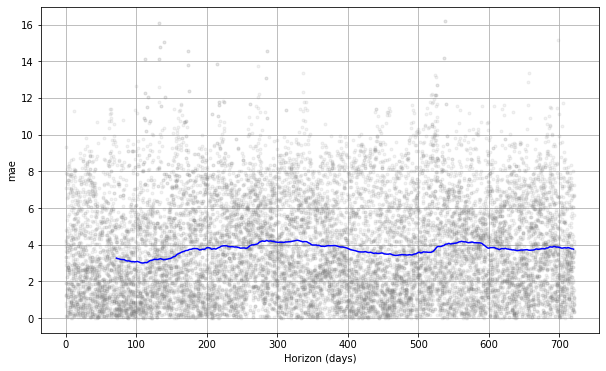

In [34]:
from prophet.plot import plot_cross_validation_metric
fig_cv1 = plot_cross_validation_metric(df_cv1, metric = 'mae')

## Modelo - Cluster 2

In [35]:
#Fazendo o mesmo procedimento para os outros Clusters
#Cluster 2

modelo2 = Prophet()
modelo2 = modelo2.fit(new_cluster2)



11:13:58 - cmdstanpy - INFO - Chain [1] start processing
11:14:10 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
future2 = modelo2.make_future_dataframe(periods= 1327, freq= 'D')
future2.tail()

,ds
10569,2023-12-27
10570,2023-12-28
10571,2023-12-29
10572,2023-12-30
10573,2023-12-31


In [37]:
#Predict

forecast2 = modelo2.predict(future2)
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-01-01,25.370009,22.015427,24.534432,25.370009,25.370009,-2.047297,-2.047297,-2.047297,-0.042299,-0.042299,-0.042299,-2.004999,-2.004999,-2.004999,0.0,0.0,0.0,23.322712
1,1995-01-02,25.371810,21.977977,24.566161,25.371810,25.371810,-2.060138,-2.060138,-2.060138,-0.031991,-0.031991,-0.031991,-2.028147,-2.028147,-2.028147,0.0,0.0,0.0,23.311672
2,1995-01-03,25.373612,21.994799,24.556482,25.373612,25.373612,-2.037215,-2.037215,-2.037215,0.010548,0.010548,0.010548,-2.047763,-2.047763,-2.047763,0.0,0.0,0.0,23.336397
3,1995-01-04,25.375413,22.057794,24.627312,25.375413,25.375413,-2.062958,-2.062958,-2.062958,0.000932,0.000932,0.000932,-2.063890,-2.063890,-2.063890,0.0,0.0,0.0,23.312455
4,1995-01-05,25.377214,22.148437,24.577756,25.377214,25.377214,-2.050758,-2.050758,-2.050758,0.025879,0.025879,0.025879,-2.076637,-2.076637,-2.076637,0.0,0.0,0.0,23.326456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10569,2023-12-27,26.305533,22.492934,26.575376,24.754554,27.989899,-1.828307,-1.828307,-1.828307,0.000932,0.000932,0.000932,-1.829239,-1.829239,-1.829239,0.0,0.0,0.0,24.477227
10570,2023-12-28,26.305840,22.548114,26.461517,24.751907,27.991697,-1.843152,-1.843152,-1.843152,0.025879,0.025879,0.025879,-1.869031,-1.869031,-1.869031,0.0,0.0,0.0,24.462688
10571,2023-12-29,26.306146,22.433895,26.376369,24.749261,27.993494,-1.870575,-1.870575,-1.870575,0.035550,0.035550,0.035550,-1.906125,-1.906125,-1.906125,0.0,0.0,0.0,24.435571
10572,2023-12-30,26.306452,22.445713,26.429139,24.746615,27.995291,-1.938858,-1.938858,-1.938858,0.001380,0.001380,0.001380,-1.940239,-1.940239,-1.940239,0.0,0.0,0.0,24.367594


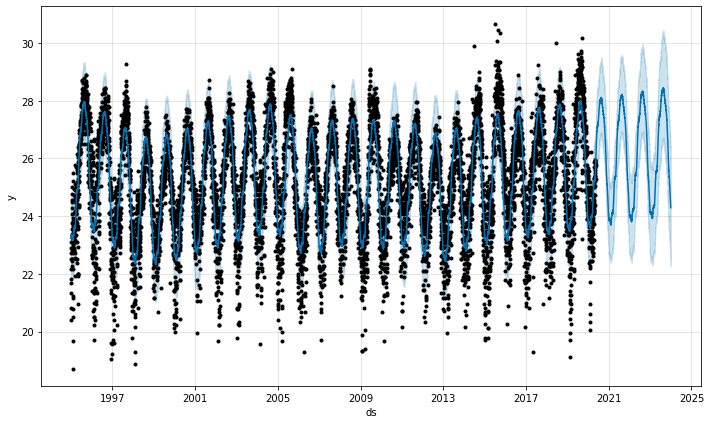

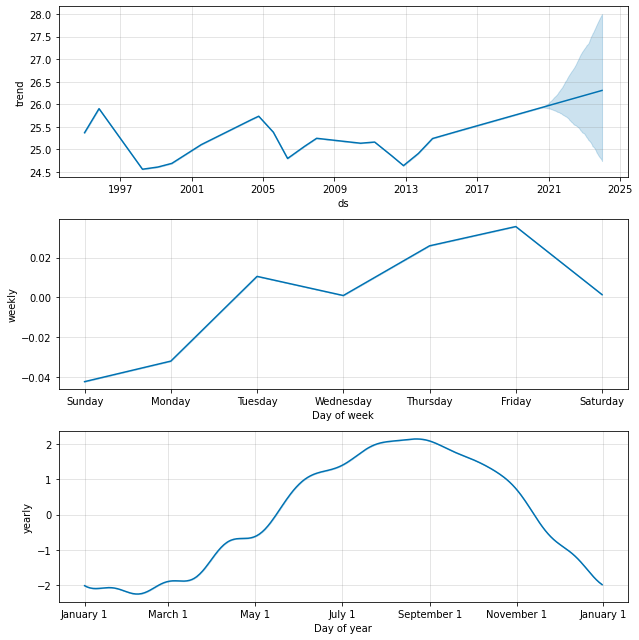

In [38]:
# Gráfico Modelo - Cluster 2
fig_cluster2 = modelo2.plot(forecast2)
fig_cluster22= modelo2.plot_components(forecast2)

In [39]:
df_cv2 = cross_validation(modelo2, initial= '4800 days', period = '1400 days', horizon= '720 days')

df_cv2.head()

  0%|          | 0/3 [00:00<?, ?it/s]11:14:18 - cmdstanpy - INFO - Chain [1] start processing
11:14:27 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:10<00:21, 10.82s/it]11:14:29 - cmdstanpy - INFO - Chain [1] start processing
11:14:37 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:21<00:10, 10.52s/it]11:14:40 - cmdstanpy - INFO - Chain [1] start processing
11:14:51 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:34<00:00, 11.45s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-09-24,26.649407,25.388056,27.889926,26.83,2010-09-23
1,2010-09-25,26.617782,25.306033,27.919752,26.67,2010-09-23
2,2010-09-26,26.564176,25.242347,27.774248,26.28,2010-09-23
3,2010-09-27,26.575874,25.488287,27.788527,25.94,2010-09-23
4,2010-09-28,26.571495,25.389741,27.793673,25.89,2010-09-23


In [40]:
df_p2 = performance_metrics(df_cv2)
df_p2.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,72 days,0.683260,0.826595,0.639636,0.023672,0.019763,0.023950,0.875000
1,73 days,0.682964,0.826416,0.639591,0.023680,0.019623,0.023958,0.875000
2,74 days,0.690429,0.830921,0.644056,0.023897,0.019623,0.024163,0.870370
3,75 days,0.704176,0.839152,0.649587,0.024168,0.019763,0.024420,0.865741
4,76 days,0.706382,0.840466,0.649220,0.024190,0.019623,0.024438,0.861111


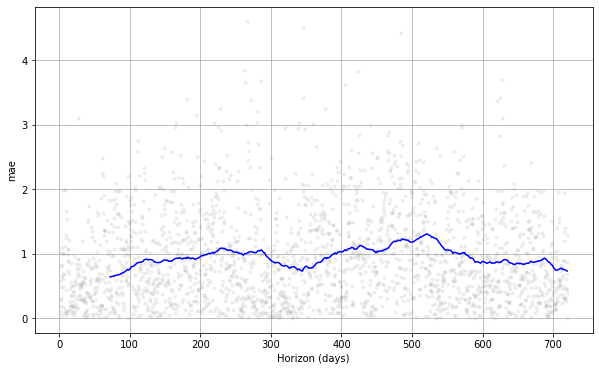

In [41]:
fig_cv2 = plot_cross_validation_metric(df_cv2, metric = 'mae')

## Modelo - Cluster 3

In [42]:
#Cluster 3

modelo3 = Prophet()
modelo3 = modelo3.fit(new_cluster3)


11:14:56 - cmdstanpy - INFO - Chain [1] start processing
11:15:10 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
future3 = modelo3.make_future_dataframe(periods= 1327, freq= 'D')
future3.tail()

,ds
10576,2023-12-27
10577,2023-12-28
10578,2023-12-29
10579,2023-12-30
10580,2023-12-31


In [44]:
#Predict

forecast3 = modelo3.predict(future3)
forecast3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-01-01,15.904687,3.435838,13.521576,15.904687,15.904687,-7.391803,-7.391803,-7.391803,-0.064334,-0.064334,-0.064334,-7.327469,-7.327469,-7.327469,0.0,0.0,0.0,8.512884
1,1995-01-02,15.904480,3.577635,13.417350,15.904480,15.904480,-7.315028,-7.315028,-7.315028,0.011455,0.011455,0.011455,-7.326483,-7.326483,-7.326483,0.0,0.0,0.0,8.589452
2,1995-01-03,15.904272,3.560759,13.732978,15.904272,15.904272,-7.287253,-7.287253,-7.287253,0.036704,0.036704,0.036704,-7.323957,-7.323957,-7.323957,0.0,0.0,0.0,8.617019
3,1995-01-04,15.904065,4.011708,13.521164,15.904065,15.904065,-7.238769,-7.238769,-7.238769,0.081425,0.081425,0.081425,-7.320193,-7.320193,-7.320193,0.0,0.0,0.0,8.665296
4,1995-01-05,15.903857,3.382658,13.779661,15.903857,15.903857,-7.273315,-7.273315,-7.273315,0.042122,0.042122,0.042122,-7.315437,-7.315437,-7.315437,0.0,0.0,0.0,8.630542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10576,2023-12-27,16.155139,4.121888,14.056079,15.753515,16.556562,-7.210456,-7.210456,-7.210456,0.081425,0.081425,0.081425,-7.291880,-7.291880,-7.291880,0.0,0.0,0.0,8.944683
10577,2023-12-28,16.155000,3.866961,13.735276,15.752643,16.556985,-7.263428,-7.263428,-7.263428,0.042122,0.042122,0.042122,-7.305549,-7.305549,-7.305549,0.0,0.0,0.0,8.891573
10578,2023-12-29,16.154862,3.752572,13.624220,15.752035,16.557398,-7.356710,-7.356710,-7.356710,-0.041220,-0.041220,-0.041220,-7.315490,-7.315490,-7.315490,0.0,0.0,0.0,8.798152
10579,2023-12-30,16.154723,4.056917,14.033519,15.751901,16.557744,-7.388305,-7.388305,-7.388305,-0.066151,-0.066151,-0.066151,-7.322154,-7.322154,-7.322154,0.0,0.0,0.0,8.766418


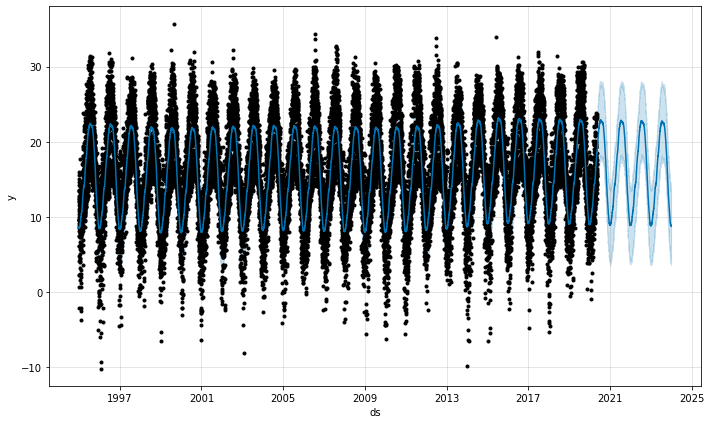

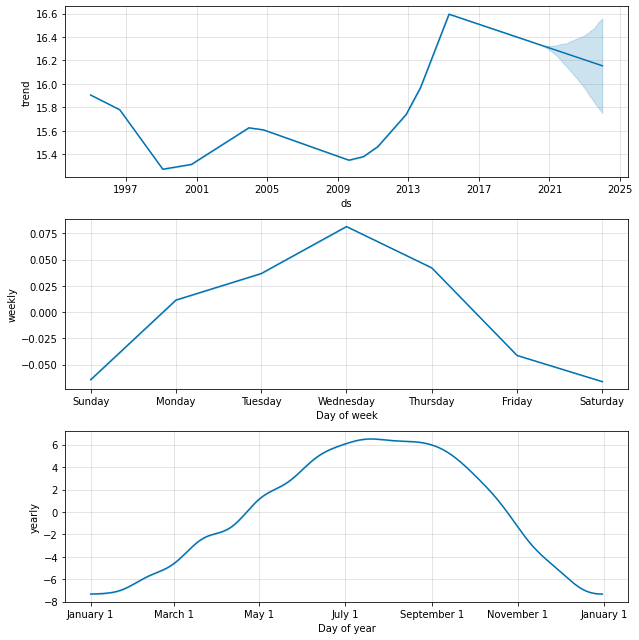

In [45]:
# Gráfico Modelo - Cluster 3
fig_cluster3 = modelo3.plot(forecast3)
fig_cluster32= modelo3.plot_components(forecast3)

In [46]:
df_cv3 = cross_validation(modelo3, initial= '4800 days', period = '1400 days', horizon= '720 days')

df_cv3.head()

  0%|          | 0/3 [00:00<?, ?it/s]11:15:20 - cmdstanpy - INFO - Chain [1] start processing
11:15:28 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [00:11<00:23, 11.78s/it]11:15:32 - cmdstanpy - INFO - Chain [1] start processing
11:15:41 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [00:24<00:12, 12.24s/it]11:15:45 - cmdstanpy - INFO - Chain [1] start processing
11:15:59 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [00:41<00:00, 13.85s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-09-24,19.244963,14.359988,23.960313,19.78,2010-09-23
1,2010-09-24,19.244963,14.335344,23.905711,20.33,2010-09-23
2,2010-09-24,19.244963,14.226874,23.902645,26.22,2010-09-23
3,2010-09-25,19.039083,13.848666,23.889375,26.83,2010-09-23
4,2010-09-25,19.039083,14.387214,24.127892,22.28,2010-09-23


In [47]:
df_p3 = performance_metrics(df_cv3)
df_p3.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,72 days,13.677076,3.698253,3.067074,0.180173,0.135754,0.166524,0.811728
1,73 days,13.693208,3.700434,3.071583,0.181512,0.137460,0.167629,0.810185
2,74 days,13.744572,3.707367,3.069799,0.208636,0.136987,0.170204,0.807099
3,75 days,13.909056,3.729485,3.074186,0.227281,0.135754,0.173104,0.804012
4,76 days,14.136238,3.759819,3.086817,0.236271,0.137832,0.176429,0.802469


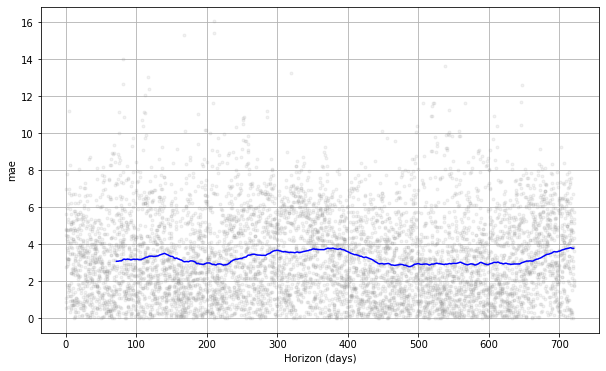

In [48]:

fig_cv3 = plot_cross_validation_metric(df_cv3, metric = 'mae')

## Modelo - Cluster 4

In [49]:
#Cluster 4

modelo4 = Prophet()
modelo4 = modelo4.fit(new_cluster4)


11:16:07 - cmdstanpy - INFO - Chain [1] start processing
11:17:39 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
future4 = modelo3.make_future_dataframe(periods= 1327, freq= 'D')
future4.tail()

,ds
10576,2023-12-27
10577,2023-12-28
10578,2023-12-29
10579,2023-12-30
10580,2023-12-31


In [51]:
#Predict

forecast4 = modelo4.predict(future4)
forecast4

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-01-01,12.416872,-4.697228,7.180145,12.416872,12.416872,-11.198101,-11.198101,-11.198101,-0.064329,-0.064329,-0.064329,-11.133772,-11.133772,-11.133772,0.0,0.0,0.0,1.218771
1,1995-01-02,12.414945,-4.397740,7.609224,12.414945,12.414945,-11.180396,-11.180396,-11.180396,0.001595,0.001595,0.001595,-11.181991,-11.181991,-11.181991,0.0,0.0,0.0,1.234549
2,1995-01-03,12.413018,-4.912437,7.448809,12.413018,12.413018,-11.153200,-11.153200,-11.153200,0.079782,0.079782,0.079782,-11.232982,-11.232982,-11.232982,0.0,0.0,0.0,1.259818
3,1995-01-04,12.411092,-4.751459,7.831841,12.411092,12.411092,-11.173868,-11.173868,-11.173868,0.113013,0.113013,0.113013,-11.286881,-11.286881,-11.286881,0.0,0.0,0.0,1.237224
4,1995-01-05,12.409165,-5.419845,7.446889,12.409165,12.409165,-11.312958,-11.312958,-11.312958,0.030736,0.030736,0.030736,-11.343694,-11.343694,-11.343694,0.0,0.0,0.0,1.096207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10576,2023-12-27,12.688663,-5.982954,9.808198,8.634674,16.888912,-10.798196,-10.798196,-10.798196,0.113013,0.113013,0.113013,-10.911208,-10.911208,-10.911208,0.0,0.0,0.0,1.890467
10577,2023-12-28,12.688497,-5.074922,10.029749,8.631697,16.893374,-10.920915,-10.920915,-10.920915,0.030736,0.030736,0.030736,-10.951651,-10.951651,-10.951651,0.0,0.0,0.0,1.767582
10578,2023-12-29,12.688331,-5.665511,9.136517,8.628720,16.897835,-11.058396,-11.058396,-11.058396,-0.066079,-0.066079,-0.066079,-10.992317,-10.992317,-10.992317,0.0,0.0,0.0,1.629935
10579,2023-12-30,12.688165,-5.913116,9.489643,8.625743,16.902297,-11.128613,-11.128613,-11.128613,-0.094717,-0.094717,-0.094717,-11.033896,-11.033896,-11.033896,0.0,0.0,0.0,1.559552


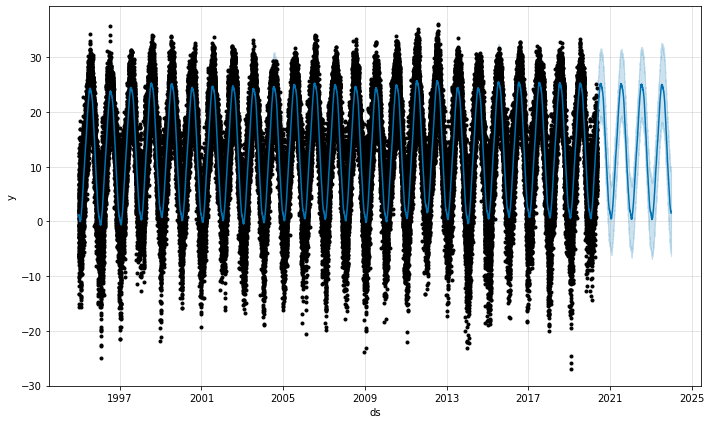

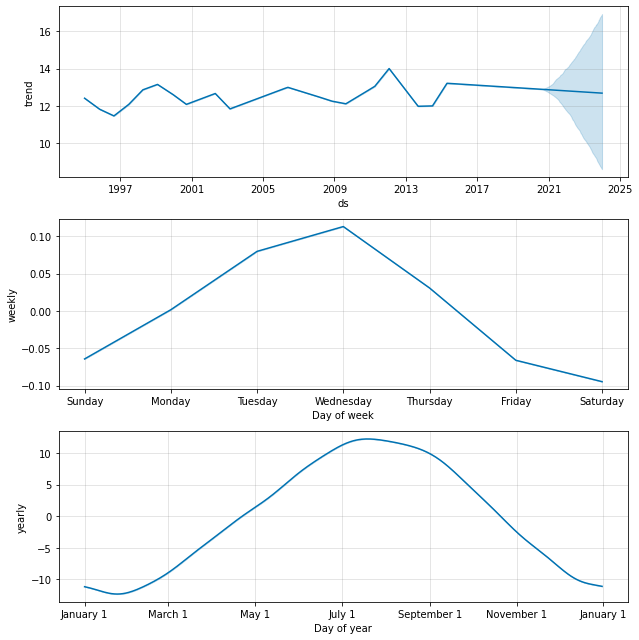

In [52]:
# Gráficos Modelo - Cluster 4
fig_cluster4 = modelo4.plot(forecast4)
fig_cluster42= modelo4.plot_components(forecast4)

In [53]:
df_cv4 = cross_validation(modelo4, initial= '4800 days', period = '1400 days', horizon= '720 days')

df_cv4.head()

  0%|          | 0/3 [00:00<?, ?it/s]11:17:49 - cmdstanpy - INFO - Chain [1] start processing
11:19:10 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [01:28<02:56, 88.33s/it]11:19:18 - cmdstanpy - INFO - Chain [1] start processing
11:20:31 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [02:48<01:23, 83.37s/it]11:20:38 - cmdstanpy - INFO - Chain [1] start processing
11:22:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [04:37<00:00, 92.46s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-09-24,18.141841,12.027566,24.321756,24.44,2010-09-23
1,2010-09-24,18.141841,11.963752,24.154596,20.28,2010-09-23
2,2010-09-24,18.141841,12.323447,24.057020,26.06,2010-09-23
3,2010-09-24,18.141841,11.883105,24.542164,14.06,2010-09-23
4,2010-09-24,18.141841,12.335100,24.440356,22.94,2010-09-23


In [54]:


df_p4 = performance_metrics(df_cv4)
df_p4.head()

,horizon,mse,rmse,mae,mdape,smape,coverage
0,72 days,14.664626,3.829442,3.039773,0.139231,0.215928,0.885522
1,73 days,14.514079,3.809735,3.023186,0.138745,0.220329,0.886364
2,74 days,14.378937,3.791957,3.008117,0.138138,0.225567,0.889310
3,75 days,14.471468,3.804138,3.013184,0.139231,0.231481,0.888889
4,76 days,14.572439,3.817386,3.016300,0.139486,0.237356,0.889310


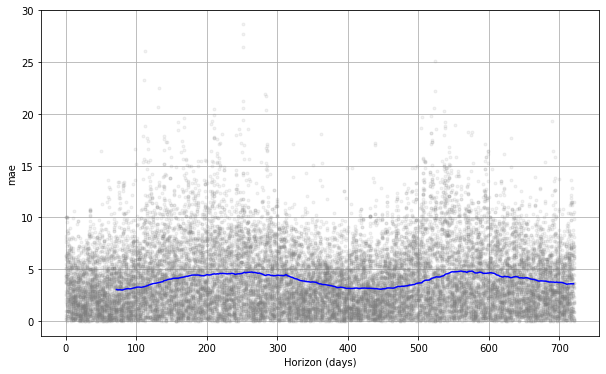

In [55]:


fig_cv4 = plot_cross_validation_metric(df_cv4, metric = 'mae')

## Modelo - Sem cluster tabela geral

In [ ]:
top_20_us_new = top_20_us_new.rename(columns={'DimCalendario_DataCalendario': 'ds', 'FatTempearatura_ValMedioTemperaturaCelsius': 'y'})
top_20_us_new



,ds,y,ClusterCidade_ClusterFinal
1294054,1995-01-01,13.56,1
1294055,1995-01-02,12.83,1
1294056,1995-01-03,12.39,1
1294057,1995-01-04,12.00,1
1294058,1995-01-05,13.67,1
...,...,...,...
2555233,2020-05-09,22.89,4
2555234,2020-05-10,24.33,4
2555235,2020-05-11,20.33,4
2555236,2020-05-12,13.72,4


In [ ]:
model = Prophet()
model.fit(top_20_us_new)

15:35:21 - cmdstanpy - INFO - Chain [1] start processing
15:37:58 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods = 1327, freq='D' )
future.tail()

,ds
10576,2023-12-27
10577,2023-12-28
10578,2023-12-29
10579,2023-12-30
10580,2023-12-31


In [ ]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-01-01,16.038741,-1.322202,15.548948,16.038741,16.038741,-8.960051,-8.960051,-8.960051,-0.057853,-0.057853,-0.057853,-8.902198,-8.902198,-8.902198,0.0,0.0,0.0,7.078690
1,1995-01-02,16.037884,-1.812300,15.314708,16.037884,16.037884,-8.915414,-8.915414,-8.915414,0.012043,0.012043,0.012043,-8.927457,-8.927457,-8.927457,0.0,0.0,0.0,7.122470
2,1995-01-03,16.037028,-1.111231,15.773372,16.037028,16.037028,-8.903381,-8.903381,-8.903381,0.049092,0.049092,0.049092,-8.952473,-8.952473,-8.952473,0.0,0.0,0.0,7.133646
3,1995-01-04,16.036171,-1.111934,14.976128,16.036171,16.036171,-8.915789,-8.915789,-8.915789,0.061689,0.061689,0.061689,-8.977478,-8.977478,-8.977478,0.0,0.0,0.0,7.120382
4,1995-01-05,16.035314,-1.334209,14.778976,16.035314,16.035314,-8.977550,-8.977550,-8.977550,0.025090,0.025090,0.025090,-9.002639,-9.002639,-9.002639,0.0,0.0,0.0,7.057764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10576,2023-12-27,16.538554,-0.268828,16.289231,14.901967,18.101593,-8.690583,-8.690583,-8.690583,0.061689,0.061689,0.061689,-8.752272,-8.752272,-8.752272,0.0,0.0,0.0,7.847971
10577,2023-12-28,16.538453,-0.997722,16.269408,14.900994,18.102997,-8.759462,-8.759462,-8.759462,0.025090,0.025090,0.025090,-8.784552,-8.784552,-8.784552,0.0,0.0,0.0,7.778991
10578,2023-12-29,16.538352,-0.135569,15.710112,14.900021,18.104401,-8.843029,-8.843029,-8.843029,-0.028414,-0.028414,-0.028414,-8.814615,-8.814615,-8.814615,0.0,0.0,0.0,7.695323
10579,2023-12-30,16.538251,-0.643877,16.355691,14.899048,18.105669,-8.904550,-8.904550,-8.904550,-0.061646,-0.061646,-0.061646,-8.842904,-8.842904,-8.842904,0.0,0.0,0.0,7.633701


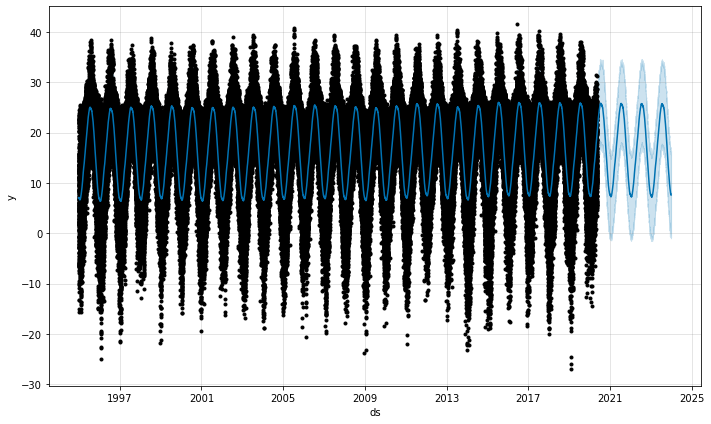

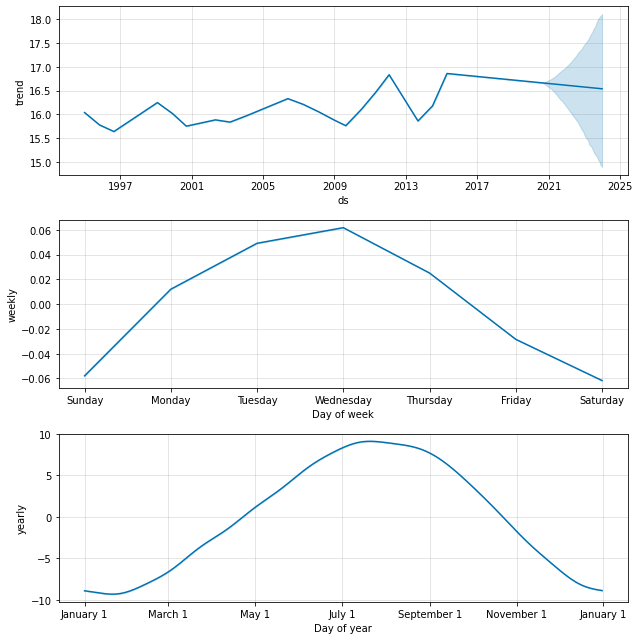

In [ ]:
fig_geral = model.plot(forecast)
fig_geral2 = model.plot_components(forecast)


In [ ]:
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-01-01,20.483555,5.389734,21.455435,20.483555,20.483555,-7.116977,-7.116977,-7.116977,-0.045534,-0.045534,-0.045534,-7.071443,-7.071443,-7.071443,0.0,0.0,0.0,13.366578
1,1995-01-02,20.483495,5.060478,22.759228,20.483495,20.483495,-7.035757,-7.035757,-7.035757,0.037654,0.037654,0.037654,-7.073411,-7.073411,-7.073411,0.0,0.0,0.0,13.447737
2,1995-01-03,20.483434,4.576657,22.018609,20.483434,20.483434,-7.059653,-7.059653,-7.059653,0.011772,0.011772,0.011772,-7.071425,-7.071425,-7.071425,0.0,0.0,0.0,13.423781
3,1995-01-04,20.483374,4.582707,21.918709,20.483374,20.483374,-7.082201,-7.082201,-7.082201,-0.016329,-0.016329,-0.016329,-7.065872,-7.065872,-7.065872,0.0,0.0,0.0,13.401172
4,1995-01-05,20.483313,4.800423,22.053731,20.483313,20.483313,-7.047877,-7.047877,-7.047877,0.009271,0.009271,0.009271,-7.057148,-7.057148,-7.057148,0.0,0.0,0.0,13.435436


In [ ]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial= '4800 days', period = '1400 days', horizon= '720 days')

df_cv.head()

  0%|          | 0/3 [00:00<?, ?it/s]18:01:17 - cmdstanpy - INFO - Chain [1] start processing
18:03:09 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 1/3 [02:04<04:09, 124.69s/it]18:03:23 - cmdstanpy - INFO - Chain [1] start processing
18:05:18 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 2/3 [04:13<02:06, 126.95s/it]18:05:32 - cmdstanpy - INFO - Chain [1] start processing
18:07:15 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 3/3 [06:11<00:00, 123.84s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-09-24,20.541187,12.334412,29.118319,28.17,2010-09-23
1,2010-09-24,20.541187,11.962112,28.635405,27.00,2010-09-23
2,2010-09-24,20.541187,12.693334,28.754303,19.78,2010-09-23
3,2010-09-24,20.541187,12.046388,28.706387,26.33,2010-09-23
4,2010-09-24,20.541187,12.765798,28.984342,22.94,2010-09-23


In [ ]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mdape,smape,coverage
0,72 days,24.668213,4.966710,3.955845,0.152477,0.225363,0.903830
1,73 days,24.921498,4.992144,3.973655,0.153050,0.229646,0.901726
2,74 days,25.147615,5.014740,3.983226,0.153388,0.233763,0.900042
3,75 days,25.401426,5.039983,3.996172,0.153770,0.237768,0.898359
4,76 days,25.651160,5.064697,4.006911,0.154052,0.241634,0.896044


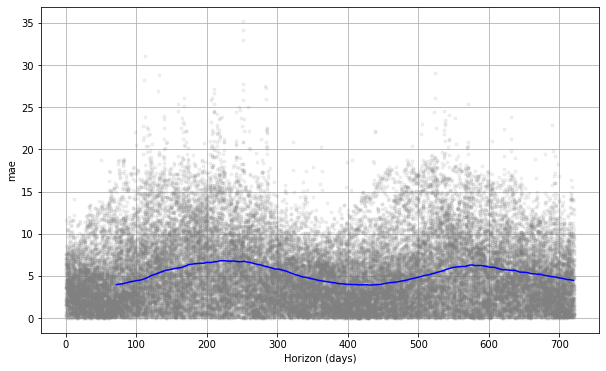

In [ ]:
from prophet.plot import plot_cross_validation_metric

fig_cv = plot_cross_validation_metric(df_cv, metric = 'mae')

### Após a realização do processo de treinamento do modelo em cada cluster será feito a junção das quatro bases

In [ ]:
# Criando a coluna cluster em cada dataset
forecast1['Cluster'] = 1
forecast2['Cluster'] = 2
forecast3['Cluster'] = 3
forecast4['Cluster'] = 4


In [ ]:
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Cluster
0,1995-01-01,20.483555,5.389734,21.455435,20.483555,20.483555,-7.116977,-7.116977,-7.116977,-0.045534,-0.045534,-0.045534,-7.071443,-7.071443,-7.071443,0.0,0.0,0.0,13.366578,1
1,1995-01-02,20.483495,5.060478,22.759228,20.483495,20.483495,-7.035757,-7.035757,-7.035757,0.037654,0.037654,0.037654,-7.073411,-7.073411,-7.073411,0.0,0.0,0.0,13.447737,1
2,1995-01-03,20.483434,4.576657,22.018609,20.483434,20.483434,-7.059653,-7.059653,-7.059653,0.011772,0.011772,0.011772,-7.071425,-7.071425,-7.071425,0.0,0.0,0.0,13.423781,1
3,1995-01-04,20.483374,4.582707,21.918709,20.483374,20.483374,-7.082201,-7.082201,-7.082201,-0.016329,-0.016329,-0.016329,-7.065872,-7.065872,-7.065872,0.0,0.0,0.0,13.401172,1
4,1995-01-05,20.483313,4.800423,22.053731,20.483313,20.483313,-7.047877,-7.047877,-7.047877,0.009271,0.009271,0.009271,-7.057148,-7.057148,-7.057148,0.0,0.0,0.0,13.435436,1


In [ ]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,Cluster
0,1995-01-01,25.370009,22.063985,24.594696,25.370009,25.370009,-2.047297,-2.047297,-2.047297,-0.042299,-0.042299,-0.042299,-2.004999,-2.004999,-2.004999,0.0,0.0,0.0,23.322712,2
1,1995-01-02,25.371810,22.116312,24.634352,25.371810,25.371810,-2.060138,-2.060138,-2.060138,-0.031991,-0.031991,-0.031991,-2.028147,-2.028147,-2.028147,0.0,0.0,0.0,23.311672,2
2,1995-01-03,25.373612,22.084488,24.563731,25.373612,25.373612,-2.037215,-2.037215,-2.037215,0.010548,0.010548,0.010548,-2.047763,-2.047763,-2.047763,0.0,0.0,0.0,23.336397,2
3,1995-01-04,25.375413,22.145812,24.624027,25.375413,25.375413,-2.062958,-2.062958,-2.062958,0.000932,0.000932,0.000932,-2.063890,-2.063890,-2.063890,0.0,0.0,0.0,23.312455,2
4,1995-01-05,25.377214,21.986036,24.582237,25.377214,25.377214,-2.050758,-2.050758,-2.050758,0.025879,0.025879,0.025879,-2.076637,-2.076637,-2.076637,0.0,0.0,0.0,23.326456,2


### Fazendo o merge das 4 bases

In [ ]:
# Juntando as bases
df_final = pd.merge(forecast1, forecast2, how = 'outer')

df_final2= pd.merge(forecast3,forecast4, how = 'outer')

df_versao_final = pd.merge(df_final, df_final2,  how ='outer')
df_versao_final.tail()

df_basefinal = df_versao_final[['ds', 'yhat', 'Cluster']]
df_basefinal.head()

,ds,yhat,Cluster
0,1995-01-01,13.366578,1
1,1995-01-02,13.447737,1
2,1995-01-03,13.423781,1
3,1995-01-04,13.401172,1
4,1995-01-05,13.435436,1


In [ ]:
df_basefinal.tail()

,ds,yhat,Cluster
42311,2023-12-27,1.890467,4
42312,2023-12-28,1.767582,4
42313,2023-12-29,1.629935,4
42314,2023-12-30,1.559552,4
42315,2023-12-31,1.546675,4


## Tabela com os dados finais

In [ ]:
# Informações da tabela final
df_basefinal.shape

(42316, 3)

In [ ]:
# Renomeando as colunas
df_basefinal = df_basefinal.rename(columns={'ds': 'Data', 'yhat': 'Celsius'})
df_basefinal.head()

,Data,Celsius,Cluster
0,1995-01-01,13.366578,1
1,1995-01-02,13.447737,1
2,1995-01-03,13.423781,1
3,1995-01-04,13.401172,1
4,1995-01-05,13.435436,1


In [ ]:
# Formatando a coluna Celsius para uma casa decimal após a vírgula
df_basefinal['Celsius'] = round((df_basefinal['Celsius']),1)
df_basefinal.tail()

,Data,Celsius,Cluster
42311,2023-12-27,1.9,4
42312,2023-12-28,1.8,4
42313,2023-12-29,1.6,4
42314,2023-12-30,1.6,4
42315,2023-12-31,1.5,4


In [ ]:
# Renomeando as colunas da tabela que contém os dados resumidos de Cidade, Coordenadas e Cluster
data_top20 = top_20_us_mapa.rename(columns={'DimCidade_NomCidade': 'City', 'DimCidade_ValLatitude': 'Lat', 
                                                'DimCidade_ValLongitude': 'Long', 'ClusterCidade_ClusterFinal': 'Cluster'})
data_top20

,City,Lat,Long,Cluster
DimCidade_NomCidade,,,,
Atlanta,Atlanta,33.748992,-84.390264,3
Boston,Boston,42.355433,-71.060511,4
Chicago,Chicago,41.875562,-87.624421,4
Denver,Denver,39.739236,-104.984862,4
Detroit,Detroit,42.331551,-83.046640,4
Honolulu,Honolulu,21.289100,-157.717299,2
Houston,Houston,29.758938,-95.367697,1
Indianapolis,Indianapolis,39.768333,-86.158350,4
Las Vegas,Las Vegas,36.167256,-115.148516,1


## CÓDIGO DE SAÍDA / RESULTADO

### Foi feito uma interface para que o usuário podesse inserir os dados de entrada:
- Opção 1: Inserir as datas futuras desejadas e a faixa de temperatura Min e Máx;
- Resultado Opção 1: Lista de cidades que terão a temperatura na faixa escolhida durante o intervalo de datas desejadas.

- Opção 2: Inserir a Cidade desejada e a faixa de temperatura Min e Máx;
- Resultado Opção 2: Informar em que faixa de Data a cidade escolhida terá a faixa de temperatura desejada.

- Opção 3: Inserir a cidade desejada com a faixa de datas futuras escolhida;
- Resultado Opção 3: Informar a temperatura Mínina, Média e Máxima na cidade escolhida durante as datas desejadas.

### Pacotes Utilizados

In [ ]:
import pandas as pd

import PySimpleGUI as psg # Utilizado para gerar o layout final;
from datetime import datetime # Utilizado para tratar datas
from html2image import Html2Image # Utilizado para converter o arquivo HTML para Imagem
import folium # Utilizado para geraçao do Mapa

ModuleNotFoundError: No module named 'PySimpleGUI'

### Códigos de Entrada, Processamento e Saída/Resultado

In [ ]:
# Usado o PySimpleGui para fazer o layout
import PySimpleGUI as psg 

#ENTRADA

#Coletar os dados de Entrada 

#Escolhendo o tema da janela
psg.theme('SandyBeach')
#Defininação do Layout da janela
layout=[[psg.Text('G12 TURISMO',size=(20, 1), font='Lucida',justification='center')],
        [psg.Text('Insira os dados desejados para sua viagem',size=(45, 1), font='Lucida',justification='left')],
        [psg.Text('Cidade:',size=(20, 1), font='Lucida',justification='left'),
        psg.Combo(top_20,default_value='',key='combo_cidade')],
        
        [psg.Text('Data Inicial', size =(20, 1), font='Lucida',justification='left'), psg.InputText()],
        [psg.Text('Data Final', size =(20, 1), font='Lucida',justification='left'), psg.InputText()],
        [psg.Text('Temperatura Minima', size =(20, 1), font='Lucida',justification='left'), psg.InputText()],
        [psg.Text('Temperatura Máxima', size =(20, 1), font='Lucida',justification='left'), psg.InputText()], 
        [psg.Button('OK', font=('Times New Roman',12)),psg.Button('CANCEL', font=('Times New Roman',12))]]

# Configuração da Janela
win =psg.Window('G12 TURISMO - PREDIÇÃO DE TEMPERATURA',layout)

# Fazer a leitura dos valores dos Inputs
inputs_texto, values=win.read()

#close first window
win.close()

combo_cidade = values['combo_cidade']  # Coletando a informação do Combo
in_cidade=combo_cidade;
in_datainicio=values[0];
in_datafinal=values[1];
in_temperaturamin=values[2];
in_temperaturamax=values[3];

  
    
# RESULTADOS

# De acordo com as entradas mostrar o resultado/saída


#### SAÍDA - CIDADES ####


# Mostrar as cidades que atendem aos requisitos de datas e temperaturas - OK
if in_cidade == "":
    
    #Converter os inputs de Data para Date
    in_datainicio = pd.to_datetime(in_datainicio)
    in_datainicio = in_datainicio.strftime('%Y-%m-%d')
    in_datafinal = pd.to_datetime(in_datafinal)
    in_datafinal = in_datafinal.strftime('%Y-%m-%d')
    
    # Converter os valores de temperatura para Float
    in_temperaturamin = float(in_temperaturamin) # Mudar formato para Float
    in_temperaturamax = float(in_temperaturamax) # Mudar formato para Float
    
    # Localizar as informações 
    resultado = df_basefinal.loc[(df_basefinal["Data"]>= in_datainicio) & (df_basefinal["Data"]<=in_datafinal) 
                               & (df_basefinal["Celsius"]>= in_temperaturamin) & (df_basefinal["Celsius"]<=in_temperaturamax)]
    
    resultado1 = resultado["Cluster"].unique() # Pegar a lista de Cluster da pesquisa
    
    list(resultado1)
    
    
    data_top20S=data_top20['Cluster'].isin(resultado1)
    data_top20 = data_top20[data_top20S]
    data_top20.head()     
   
        
    # Fazer um loop para inserir a lista de cidades no PopUp
    resultado_cidade= ""     
    for cidade in data_top20["City"].unique():            
        resultado_cidade=resultado_cidade+ " "+ cidade+ ", "                
                
    
    #transformar dados para String para exibiçao no PopUp
    #resultado_data_max = repr(resultado_data_max)
    #resultado_data_min = repr(resultado_data_min)
    in_temperaturamin = repr(in_temperaturamin)
    in_temperaturamax = repr(in_temperaturamax)
        
    #### SAÍDA - CIDADES ####
    # Mostrar resultado no PopUp       
    texto_saida = ('Lista de cidades de acordo com as datas e temperaturas escolhidas:' +  
          '\nValores de Entrada:\nNa faixa de temperatura MIN de '+ in_temperaturamin + '°C e MAX de '+ in_temperaturamax + '°C'
          '\n- Data Inicial: '+ in_datainicio +
          '\n- Data Final: '+ in_datafinal +
          '\nResultado Lista das Cidades: '+ resultado_cidade)
 
    #print('Texto Saida Cidades: ',texto_saida)

    

#### SAÍDA - DATAS ####


# Mostrar as datas iniciais e final de acordo com a cidade e faixa de temperatura - OK
if (in_datainicio == "") or (in_datafinal == ""):
    
    # Mostrar datas maiores que o dia atual
    from datetime import datetime
    hoje = datetime.today().strftime('%Y-%m-%d')    
    
    
    # Converter os valores de temperatura para Float
    in_temperaturamin = float(in_temperaturamin) # Mudar formato para Float
    in_temperaturamax = float(in_temperaturamax) # Mudar formato para Float
    
    # Localizar as informações
    
    # Localizar o Cluster de acordo com a cidade escolhida
    cluster = data_top20.loc[(data_top20["City"]==in_cidade)]
    cluster = cluster["Cluster"].unique() 
    cluster = float(cluster) # Mudar formato para Float    
    
    resultado = df_basefinal.loc[(df_basefinal["Celsius"]>= in_temperaturamin) & (df_basefinal["Celsius"]<=in_temperaturamax) 
                               & (df_basefinal["Cluster"]==cluster) & (df_basefinal["Data"]>hoje)]    
           
        
    resultado_data_max = resultado["Data"].max().strftime('%Y-%m-%d')
    resultado_data_min = resultado["Data"].min().strftime('%Y-%m-%d')
    
    #transformar dados para String para exibiçao no PopUp    
    resultado_data_max = repr(resultado_data_max)
    resultado_data_min = repr(resultado_data_min)
    in_temperaturamin = repr(in_temperaturamin)
    in_temperaturamax = repr(in_temperaturamax)
    
    resultado_cidade = "" #Limpando o resultado pra não dar erro na geração do Mapa.
    
    #### SAÍDA - DATAS ####
    # Mostrar resultado no PopUp       
    texto_saida = ('Informação das datas para a cidade e faixa de temperaturas escolhidas: \n' +
            'Valores de Entrada:\nCidade: '+ in_cidade + 
            '\nTemperatura MIN de '+ in_temperaturamin + '°C e MAX de '+ in_temperaturamax + '°C' +          
            '\nResultado:\n- Data Inicial: '+ resultado_data_min +
            '\n- Data Final: '+ resultado_data_max         
         )
   
    #print('Texto Saida Datas: ',texto_saida)   
    
    
    
#### SAÍDA - TEMPERATURA ####
    
# Mostrar temperatura (Pegar MIN, Média e MAX) - OK
if (in_temperaturamin == "") or (in_temperaturamax == ""): 
    
    # Localizar as informações
    
    # Localizar o Cluster de acordo com a cidade escolhida
    cluster = data_top20.loc[(data_top20["City"]==in_cidade)]
    cluster = cluster["Cluster"].unique() 
    cluster = float(cluster) # Mudar formato para Float    
    
    
    resultado = df_basefinal.loc[(df_basefinal["Data"]>= in_datainicio) & (df_basefinal["Data"]<=in_datafinal) 
                               & (df_basefinal["Cluster"]==cluster)]
    
    resultado_temperatura_media = resultado["Celsius"].mean()
    resultado_temperatura_media = round(resultado_temperatura_media,1)
    resultado_temperatura_max = resultado["Celsius"].max()
    resultado_temperatura_min = resultado["Celsius"].min()
    
    
    #transformar dados para String para exibiçao no PopUp    
    resultado_temperatura_media = repr(resultado_temperatura_media)
    resultado_temperatura_max = repr(resultado_temperatura_max)
    resultado_temperatura_min = repr(resultado_temperatura_min)    
    
    resultado_cidade = "" #Limpando o resultado pra não dar erro na geração do Mapa.

    #### SAÍDA - TEMPERATURA ####
    # Mostrar resultado no PopUp       
    texto_saida = ('Valores de temperatura para a cidade e período escolhido: \n' +   
           'Valores de Entrada:\nCidade: ' + in_cidade + '.\nData inicial ' + in_datainicio +  ' até Data Final ' + in_datafinal +
          '\nResultado:\n- Temperatura Minima: ' + resultado_temperatura_min + '°C ' +
          '\n- Temperatura Média: ' + resultado_temperatura_media + '°C ' +
          '\n- Temperatura Máxima: ' + resultado_temperatura_max + '°C ')
         
    #print('Texto Saida Temperaturas: ',texto_saida)
    
    
    

### GERANDO O MAPA COM OS DADOS DE ENTRADA E SAÍDA


# GERANDO O MAPA

#convertendo as colunas Lat e Long para Float
data_top20['Lat'] = data_top20['Lat'].astype(float, errors = 'raise')
data_top20['Long'] = data_top20['Long'].astype(float, errors = 'raise')


#Criando uma tabela somente com as cidades e coordenadas
data_top20_mapa = data_top20.groupby(['City'])['City','Lat', 'Long'].agg('max')


# Verificar se a informação da cidade é do resultado ou da entrada
if in_cidade == "":
    #Selecionar somente a cidade(s) que foram selecionadas na entrada ou saída  
    resultado_cidade1=resultado_cidade.split(',')   # Convertendo para LISTA 
    data_top20_mapa[data_top20_mapa["City"].isin(resultado_cidade1)]   
    mapa_lat = data_top20_mapa['Lat'].mean()
    mapa_long = data_top20_mapa['Long'].mean()    
    mapa_zoom = 3.4    
    
else:
    data_top20_mapa = data_top20_mapa.loc[(data_top20_mapa["City"]==in_cidade)]
    # Se for somente uma cidade dar um zoom na cidade e centralizar o mapa
    mapa_lat = data_top20_mapa['Lat'].unique()    
    mapa_long = data_top20_mapa['Long'].unique()    
    mapa_zoom = 10


# Gerar o layout do Mapa (localização do centro e zoom)
mapa = folium.Map(                                  
    location=[mapa_lat, mapa_long],
    zoom_start=mapa_zoom
)


#Plotando
for _, cidade in data_top20_mapa.iterrows():
    folium.Marker(
        location=[cidade['Lat'], cidade['Long']],
    ).add_to(mapa)

              
        
#Salvar o mapa
mapa.save('mapa.html') #O mapa é salvo no diretório onde esse notebook está salvo

# Converter o arquivo HTML para JPG para carregar no PopUp
from html2image import Html2Image

hti = Html2Image()


css = "body {}"

hti.screenshot(
    html_file='mapa.html', css_str=css,
    save_as='mapa.jpeg'
)


#### SAÍDA - POP UP
import PySimpleGUI as psg
message = ""

def popup(title, filename, message, width=90):

    lines = texto_saida
    height = 8
    message = texto_saida

    layout = [ 
        [psg.Button('Close')],
        [psg.Text(message, size=(width, height), justification='left', expand_x=True)],
        [psg.Image(filename=filename, expand_x=True)],        
    ]

    psg.Window(title, layout, size=(960, 600), keep_on_top=True, modal=True).read(close=2000)

popup('G12 Turismo', 'mapa.jpeg', message)
